In [3]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import cartopy.crs as ccrs
from glob import glob
import cmocean
import matplotlib.dates as mdates
import datetime
import sys
sys.path.append('../')
from utils import *
from numerics import *
from load import *

In [5]:
x=xr.open_dataset('/ceaza/lucas/CROCO/DESALADORAS_RUND0/OUTPUT/crocod0_avg_Y2001M1.nc')
hc,Cs_r = x.hc.item(),x.Cs_r
del x
data = load_croco('/ceaza/lucas/CROCO/DESALADORAS_RUND0/OUTPUT/crocod0_avg_Y2001M2.nc', '1949-12-31 00:00:00').sortby('time')
z_rho = rhopoints_depths(data.h.expand_dims(dim={'s_rho':data.s_rho}), data.zeta, data.s_rho, Cs_r, hc)
z_rho = z_rho.transpose('time', 's_rho', 'eta_rho', 'xi_rho')
data = xr.merge([data, z_rho.to_dataset(name='z_rho')])
control = data.copy()
del data
control

<xarray.Dataset>
Dimensions:     (xi_rho: 152, eta_rho: 252, s_rho: 50, s_w: 51, time: 28,
                 auxil: 4)
Coordinates:
  * xi_rho      (xi_rho) float32 1.0 2.0 3.0 4.0 5.0 ... 149.0 150.0 151.0 152.0
  * eta_rho     (eta_rho) float32 1.0 2.0 3.0 4.0 ... 249.0 250.0 251.0 252.0
  * s_rho       (s_rho) float32 -0.99 -0.97 -0.95 -0.93 ... -0.05 -0.03 -0.01
  * s_w         (s_w) float32 -1.0 -0.98 -0.96 -0.94 ... -0.06 -0.04 -0.02 0.0
    lon_rho     (eta_rho, xi_rho) float32 285.0 285.0 285.1 ... 289.2 289.2
    lat_rho     (eta_rho, xi_rho) float32 -33.5 -33.5 -33.5 ... -27.5 -27.5
  * time        (time) datetime64[ns] 2001-02-01T12:01:15 ... 2001-02-28T12:0...
Dimensions without coordinates: auxil
Data variables: (12/25)
    spherical   |S1 ...
    xl          float32 ...
    el          float32 ...
    Vtransform  float32 ...
    sc_r        (s_rho) float32 ...
    sc_w        (s_w) float32 ...
    ...          ...
    salt        (time, s_rho, eta_rho, xi_rho) float32 ...
    w           (time, s_rho, eta_rho, xi_rho) float32 ...
    hbl         (time, eta_rho, xi_rho) float32 ...
    u           (time, s_rho, eta_rho, xi_rho) float32 nan 0.0015 ... nan
    v           (time, s_rho, eta_rho, xi_rho) float32 nan nan nan ... nan nan
    z_rho       (time, s_rho, eta_rho, xi_rho) float32 -3.995e+03 ... -0.1446
Attributes: (12/63)
    type:                      CROCO averages file
    title:                     CENTRAL_CHILE
    date:                      
    rst_file:                  crocod0_rst.nc
    his_file:                  crocod0_his.nc
    avg_file:                  crocod0_avg.nc
    ...                        ...
    sponge_expl:               Sponge parameters : extent (m) & viscosity (m2...
    SRCS:                      main.F step.F read_inp.F timers_roms.F init_sc...
    CPP-options:               REGIONAL DESALADORA_D0 MPI OBC_WEST OBC_NORTH ...
    history:                   Thu Mar  9 18:51:47 2023: ncpdq -L 5 -7 /ceaza...
    NCO:                       netCDF Operators version 4.7.5 (Homepage = htt...
    nco_openmp_thread_number:  1

In [6]:
data = load_croco('/ceaza/lucas/CROCO/DESALADORAS_RUND0_RIOS/OUTPUT/PANUL_Q10_S60/crocod0_avg_Y2001M2.nc', '1949-12-31 00:00:00').sortby('time')
z_rho = rhopoints_depths(data.h.expand_dims(dim={'s_rho':data.s_rho}), data.zeta, data.s_rho, Cs_r, hc)
z_rho = z_rho.transpose('time', 's_rho', 'eta_rho', 'xi_rho')
data = xr.merge([data, z_rho.to_dataset(name='z_rho')])
salty = data.copy()
del data
salty

<xarray.Dataset>
Dimensions:     (xi_rho: 152, eta_rho: 252, s_rho: 50, s_w: 51, time: 28,
                 auxil: 4)
Coordinates:
  * xi_rho      (xi_rho) float32 1.0 2.0 3.0 4.0 5.0 ... 149.0 150.0 151.0 152.0
  * eta_rho     (eta_rho) float32 1.0 2.0 3.0 4.0 ... 249.0 250.0 251.0 252.0
  * s_rho       (s_rho) float32 -0.99 -0.97 -0.95 -0.93 ... -0.05 -0.03 -0.01
  * s_w         (s_w) float32 -1.0 -0.98 -0.96 -0.94 ... -0.06 -0.04 -0.02 0.0
    lon_rho     (eta_rho, xi_rho) float32 285.0 285.0 285.1 ... 289.2 289.2
    lat_rho     (eta_rho, xi_rho) float32 -33.5 -33.5 -33.5 ... -27.5 -27.5
  * time        (time) datetime64[ns] 2001-02-01T12:01:15 ... 2001-02-28T12:0...
Dimensions without coordinates: auxil
Data variables: (12/25)
    spherical   |S1 ...
    xl          float32 ...
    el          float32 ...
    Vtransform  float32 ...
    sc_r        (s_rho) float32 ...
    sc_w        (s_w) float32 ...
    ...          ...
    salt        (time, s_rho, eta_rho, xi_rho) float32 ...
    w           (time, s_rho, eta_rho, xi_rho) float32 ...
    hbl         (time, eta_rho, xi_rho) float32 ...
    u           (time, s_rho, eta_rho, xi_rho) float32 nan 0.001606 ... nan
    v           (time, s_rho, eta_rho, xi_rho) float32 nan nan nan ... nan nan
    z_rho       (time, s_rho, eta_rho, xi_rho) float32 -3.995e+03 ... -0.1446
Attributes: (12/63)
    type:                      CROCO averages file
    title:                     CENTRAL_CHILE
    date:                      
    rst_file:                  crocod0_rst.nc
    his_file:                  crocod0_his.nc
    avg_file:                  crocod0_avg.nc
    ...                        ...
    sponge_expl:               Sponge parameters : extent (m) & viscosity (m2...
    SRCS:                      main.F step.F read_inp.F timers_roms.F init_sc...
    CPP-options:               REGIONAL DESALADORA_D0 MPI OBC_WEST OBC_NORTH ...
    history:                   Mon Mar 13 16:34:52 2023: ncpdq -L 5 -7 /ceaza...
    NCO:                       netCDF Operators version 4.7.5 (Homepage = htt...
    nco_openmp_thread_number:  1

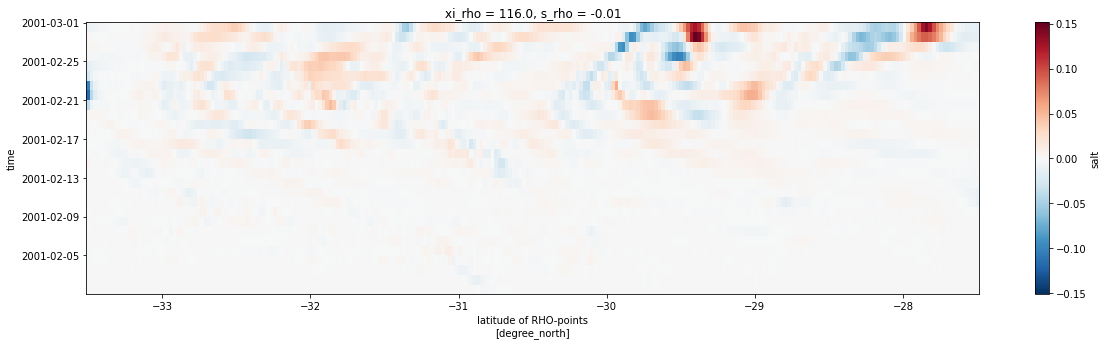

In [7]:
fig, ax = plt.subplots(1,1, figsize=(20,5))
var  = 'salt'
vmin,vmax = 34.1,34.8
srho = 49
x,y = control.isel(s_rho=srho),salty.isel(s_rho=srho)
teta=115

(y[var]-x[var]).isel(xi_rho=teta).plot(x='lat_rho',y='time')

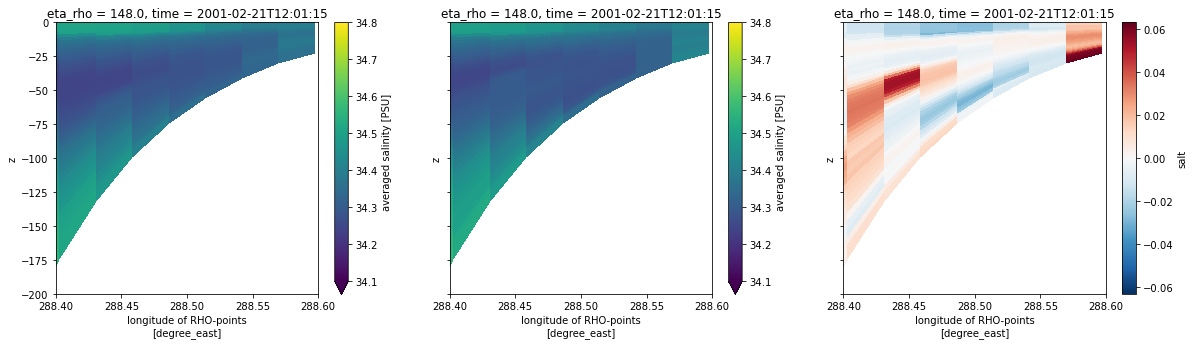

In [8]:
fig, ax = plt.subplots(1,3, sharex=True, sharey=True, figsize=(20,5))
var  = 'salt'
teta = 147
vmin,vmax = 34.1,34.8
x,y = control.isel(eta_rho=teta),salty.isel(eta_rho=teta)
tstep=20

x.coords['z'] = x.z_rho.mean('time')
y.coords['z'] = y.z_rho.mean('time')
x,y = x.where(x.mask_rho),y.where(y.mask_rho)

x[var][tstep].plot(y='z',x='lon_rho', ax=ax[0],vmin=vmin,vmax=vmax);
y[var][tstep].plot(y='z',x='lon_rho', ax=ax[1],vmin=vmin,vmax=vmax);
diff = y[var]-x[var]
diff.coords['z'] = y.coords['z']
(diff)[tstep].plot(y='z',x='lon_rho', ax=ax[2]);

for axis in ax.ravel():
    axis.set_ylim(-200,0)
    axis.set_xlim(288.4,288.6)

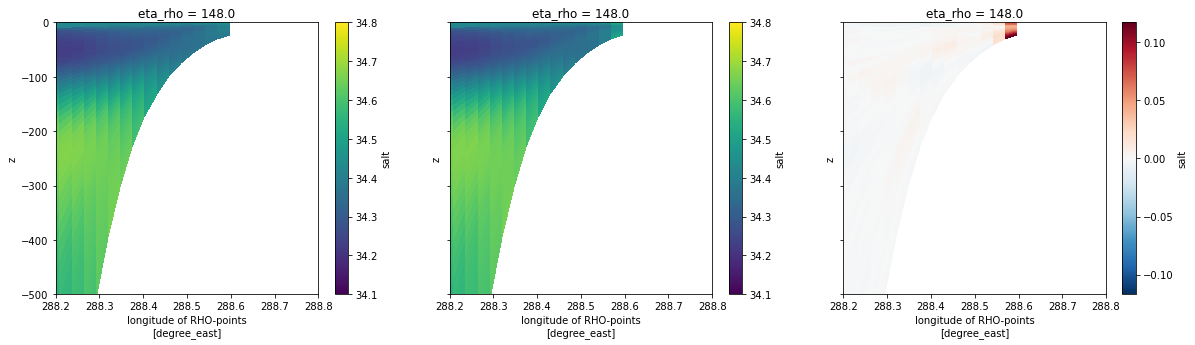

In [9]:
fig, ax = plt.subplots(1,3, sharex=True, sharey=True, figsize=(20,5))
var  = 'salt'
teta = 147
vmin,vmax = 34.1,34.8
x,y = control.isel(eta_rho=teta),salty.isel(eta_rho=teta)
z = x.z_rho.mean('time')
x,y = x.where(x.mask_rho)[var].mean('time'),y.where(y.mask_rho)[var].mean('time')

x.coords['z'] = z
y.coords['z'] = z

x.plot(y='z',x='lon_rho', ax=ax[0],vmin=vmin,vmax=vmax);
y.plot(y='z',x='lon_rho', ax=ax[1],vmin=vmin,vmax=vmax);
diff = y-x
diff.coords['z'] = z
(diff).plot(y='z',x='lon_rho', ax=ax[2]);

for axis in ax.ravel():
    axis.set_ylim(-500,0)
    axis.set_xlim(288.2,288.8)

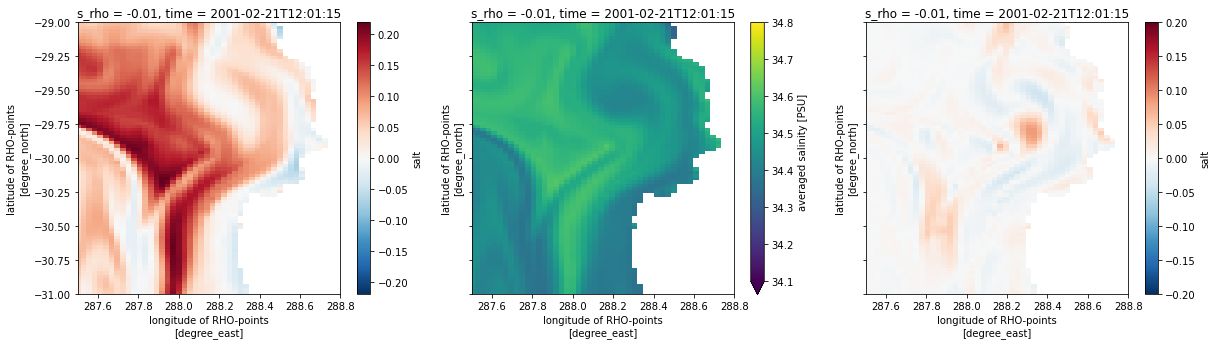

In [29]:
fig, ax = plt.subplots(1,3, sharex=True, sharey=True, figsize=(20,5))
var  = 'salt'
srho = 49
vmin,vmax = 34.1,34.8
x,y = control.isel(s_rho=srho),salty.isel(s_rho=srho)
tstep=20

x,y = x.where(x.mask_rho),y.where(y.mask_rho)

(x[var][tstep]-x[var].mean('time')).plot(y='lat_rho',x='lon_rho', ax=ax[0]);
y[var][tstep].plot(y='lat_rho',x='lon_rho', ax=ax[1],vmin=vmin,vmax=vmax);
diff = y[var]-x[var]

(diff)[tstep].plot(y='lat_rho',x='lon_rho', ax=ax[2],vmin=-0.2,vmax=0.2,cmap='RdBu_r');

for axis in ax.ravel():
    axis.set_ylim(-31,-29)
    axis.set_xlim(287.5,288.8)

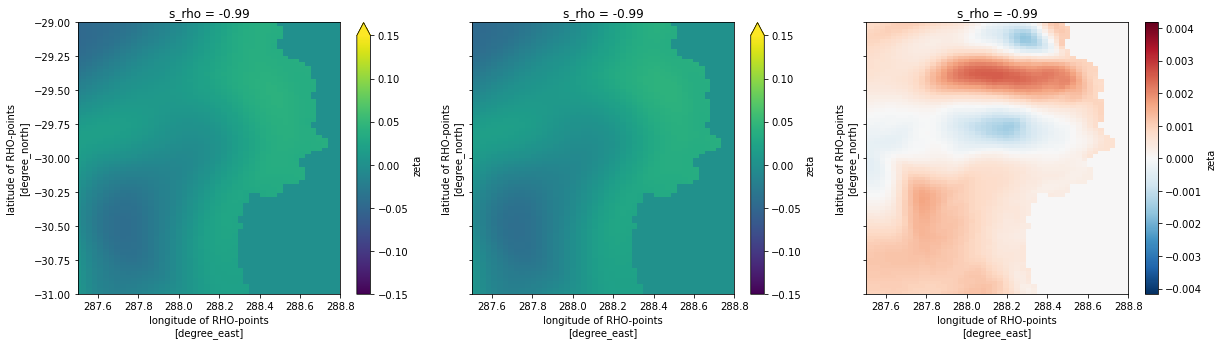

In [26]:
fig, ax = plt.subplots(1,3, sharex=True, sharey=True, figsize=(20,5))
var  = 'zeta'
srho = 0
vmin,vmax = -0.15,0.15


x,y = control.isel(s_rho=srho)[var].mean('time'),salty.isel(s_rho=srho)[var].mean('time')


x.plot(y='lat_rho',x='lon_rho', ax=ax[0],vmin=vmin,vmax=vmax);
y.plot(y='lat_rho',x='lon_rho', ax=ax[1],vmin=vmin,vmax=vmax);
diff = y-x
(diff).plot(y='lat_rho',x='lon_rho', ax=ax[2], cmap='RdBu_r');

for axis in ax.ravel():
    axis.set_ylim(-31,-29)
    axis.set_xlim(287.5,288.8)

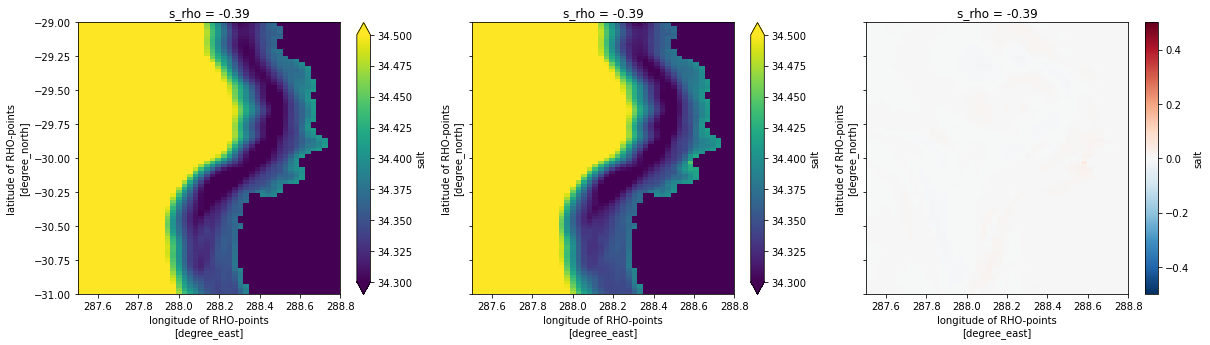

In [12]:
fig, ax = plt.subplots(1,3, sharex=True, sharey=True, figsize=(20,5))
var  = 'salt'
srho = 30
vmin,vmax = 34.3,34.5


x,y = control.isel(s_rho=srho)[var].mean('time'),salty.isel(s_rho=srho)[var].mean('time')


x.plot(y='lat_rho',x='lon_rho', ax=ax[0],vmin=vmin,vmax=vmax);
y.plot(y='lat_rho',x='lon_rho', ax=ax[1],vmin=vmin,vmax=vmax);
diff = y-x
(diff).plot(y='lat_rho',x='lon_rho', ax=ax[2], vmin=-0.5,vmax=0.5, cmap='RdBu_r');

for axis in ax.ravel():
    axis.set_ylim(-31,-29)
    axis.set_xlim(287.5,288.8)

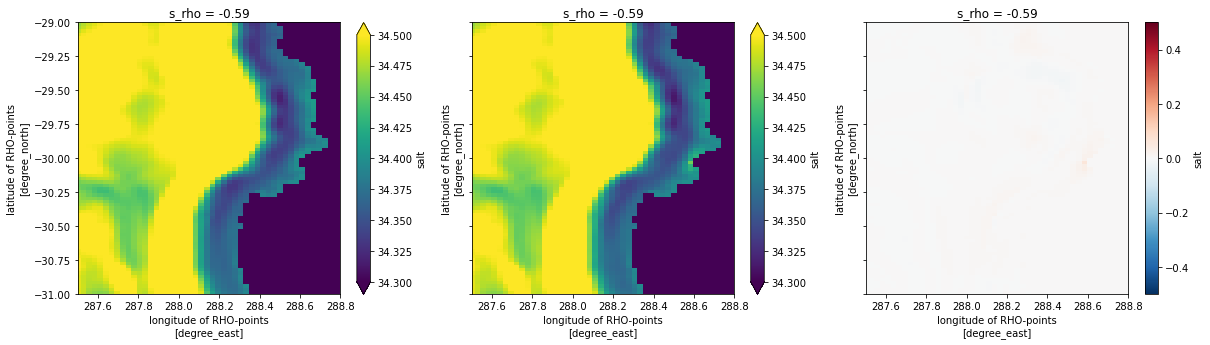

In [13]:
fig, ax = plt.subplots(1,3, sharex=True, sharey=True, figsize=(20,5))
var  = 'salt'
srho = 20
vmin,vmax = 34.3,34.5


x,y = control.isel(s_rho=srho)[var].mean('time'),salty.isel(s_rho=srho)[var].mean('time')


x.plot(y='lat_rho',x='lon_rho', ax=ax[0],vmin=vmin,vmax=vmax);
y.plot(y='lat_rho',x='lon_rho', ax=ax[1],vmin=vmin,vmax=vmax);
diff = y-x
(diff).plot(y='lat_rho',x='lon_rho', ax=ax[2], vmin=-0.5,vmax=0.5, cmap='RdBu_r');

for axis in ax.ravel():
    axis.set_ylim(-31,-29)
    axis.set_xlim(287.5,288.8)

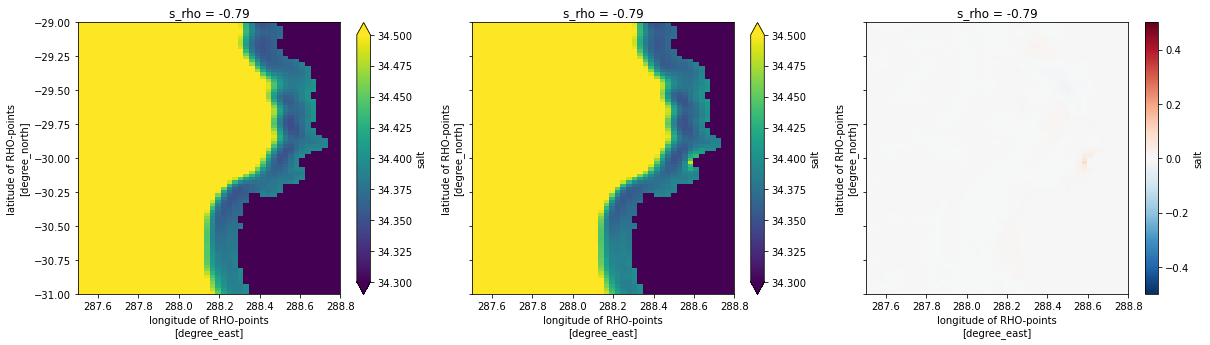

In [14]:
fig, ax = plt.subplots(1,3, sharex=True, sharey=True, figsize=(20,5))
var  = 'salt'
srho = 10
vmin,vmax = 34.3,34.5


x,y = control.isel(s_rho=srho)[var].mean('time'),salty.isel(s_rho=srho)[var].mean('time')


x.plot(y='lat_rho',x='lon_rho', ax=ax[0],vmin=vmin,vmax=vmax);
y.plot(y='lat_rho',x='lon_rho', ax=ax[1],vmin=vmin,vmax=vmax);
diff = y-x
(diff).plot(y='lat_rho',x='lon_rho', ax=ax[2], vmin=-0.5,vmax=0.5, cmap='RdBu_r');

for axis in ax.ravel():
    axis.set_ylim(-31,-29)
    axis.set_xlim(287.5,288.8)

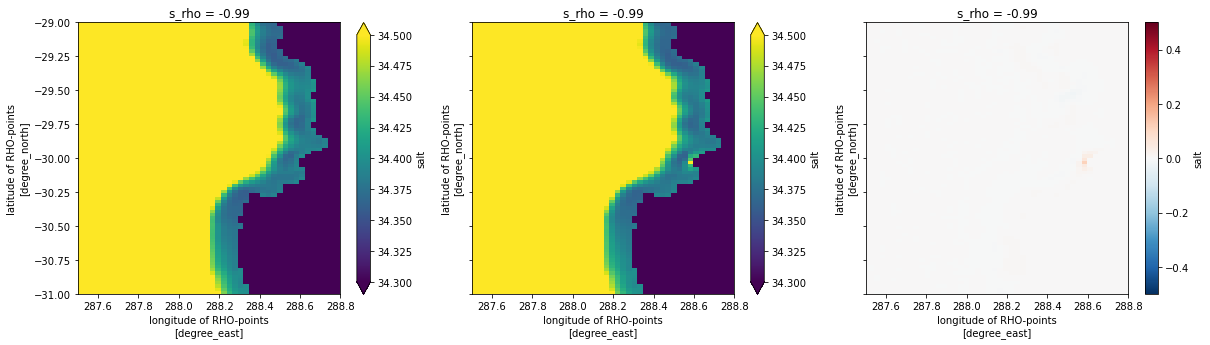

In [15]:
fig, ax = plt.subplots(1,3, sharex=True, sharey=True, figsize=(20,5))
var  = 'salt'
srho = 0
vmin,vmax = 34.3,34.5


x,y = control.isel(s_rho=srho)[var].mean('time'),salty.isel(s_rho=srho)[var].mean('time')


x.plot(y='lat_rho',x='lon_rho', ax=ax[0],vmin=vmin,vmax=vmax);
y.plot(y='lat_rho',x='lon_rho', ax=ax[1],vmin=vmin,vmax=vmax);
diff = y-x
(diff).plot(y='lat_rho',x='lon_rho', ax=ax[2], vmin=-0.5,vmax=0.5, cmap='RdBu_r');

for axis in ax.ravel():
    axis.set_ylim(-31,-29)
    axis.set_xlim(287.5,288.8)

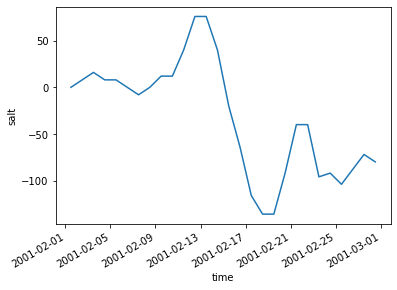

In [19]:
(salty.salt.sum('eta_rho').sum('xi_rho').sum('s_rho')-control.salt.sum('eta_rho').sum('xi_rho').sum('s_rho')).plot()